In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Sample synthetic dataset (you can replace this with a real dataset)
data = {
    'income': [45000, 54000, 72000, 61000, 38000, 49000, 58000, 45000, 83000, 67000],
    'debts': [2000, 4000, 3000, 5000, 1000, 2500, 3000, 1500, 1000, 4200],
    'payment_history': [1, 0, 1, 0, 1, 1, 1, 0, 1, 0],  # 1 = Good, 0 = Bad
    'missed_payments': [0, 2, 0, 3, 1, 0, 0, 2, 0, 1],
    'creditworthy': [1, 0, 1, 0, 1, 1, 1, 0, 1, 0]  # Target variable
}

df = pd.DataFrame(data)

In [4]:
# Features and Target
X = df.drop('creditworthy', axis=1)
y = df['creditworthy']

In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
y_prob_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

In [8]:
# Random Forest Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

In [10]:
# Evaluation
print("Logistic Regression")
print(classification_report(y_test, y_pred_logreg))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_logreg))

print("\n Random Forest")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

ROC-AUC Score: 1.0

 Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

ROC-AUC Score: 1.0


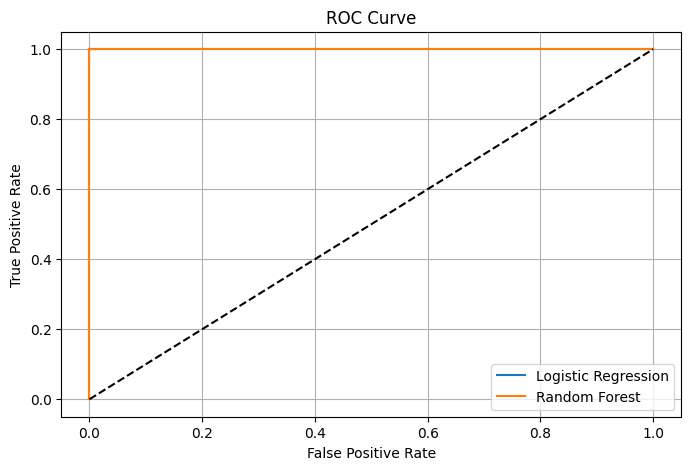

In [11]:
# Plot ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8, 5))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()